## Analysis For Instagram Dataset
- In this project , I will work on instagram dataset which has a collection of posts, offering valuable insights into content strategy and audience engagement.

## Instagram Dataset Field Description
---
### Below is a description of column fields in the Dataset:
---

#### The most critical elements for analysis are:

- Impressions: The total visibility of the post, indicating its raw reach potential and distribution success (especially from Explore and Hashtags).

- Likes: The primary metric for immediate appreciation and the simplest measure of a post's popularity.

- Engagement Total (Likes + Comments + Shares + Saves): The ultimate measure of a post's quality and value, showing how valuable users found the content
(beyond just viewing it).

- Hashtags: The text field containing the specific tags used for the post, which is crucial for analyzing the content's topic and its role in driving organic reach (Impressions from Hashtags).

## Questions to be Answered depending on the Analysis
1. The most common word in Hashtags
2. Relation between likes and explore
3. Do length of Caption affect on Impressions ?
4. Do high Profile visiting increase followers ?
5. The source that generates the most views
6. The words in Captions that increase engagement
7. Most frequently mentioned words in Hashtag

## Data Wrangling
- Gather the required data to answer your questions.
- Assess the data by exploring its quality and identifying any issues.
- Clean the data by modifying, replacing, renaming, or removing problematic entries.

In [1]:
# Load needed Libraries
import pandas as pd 

In [2]:
# load the datset into DataFrmae 
df= pd.read_csv("D:\Eraa Soft\Lec.12\Instagram data.csv",encoding="latin-1")

In [3]:
# display first rows
df.head(2)

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   

                                            Hashtags  
0  #finance #money #business #investing #investme...  
1  #healthcare #health #covid #data #datascience ...

In [4]:
# display number of rows and columns
df.shape

(119, 13)

- dataset consists of 119 posts (rows) and 13 columns

In [5]:
# check for data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


- not found any missing values
- Date column not need to be converted into Date Format


## Feature Engineering
- add column to extract the main Hashtag
- rename some columns(Impressions,From Home,From Hashtags,From Explore)
- add column (Sum_of_Sources) to sum all views from different sources
- add column Engagement_Rate by dividing (Likes+Comments+Shares+Saves) over (Impressions)
- add column highly_views to check the source 
- Hashtags to be exploded
- add column (Views_Category) to classify views
- add column to sum (Saves,Comments,Share,Likes)
- analysis Caption from count words and if affect on Impressions
- What is the highest number of views on each post?  

In [6]:
#check for Duplicates
df.duplicated().sum()

np.int64(17)

- There is 17 duplicated rows

In [7]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [8]:
# check for Duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
# check for null values 
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

- not found null values

In [10]:
# check for data siza 
df.shape

(102, 13)

- after remove duplicated items (102 rows and 13 columns)

In [11]:
# rename column (Impressions)
df.rename(columns={'Impressions':'Total_Views','From Home':'Home_Views','From Hashtags':'Hashtags_Views','From Explore':'Explore_Views',
'From Other':'Other_Views'},inplace=True)

In [12]:
# check for names of columns
df.columns

Index(['Total_Views', 'Home_Views', 'Hashtags_Views', 'Explore_Views',
       'Other_Views', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [13]:
# add column Sum_of_Sources
df['Sum_of_Sources']=df['Home_Views']+df['Hashtags_Views']+df['Explore_Views']+df['Other_Views']

- (Sum_of_Sources) appears all views even duplicated views

In [14]:
# convert column(Hashtags) into list to extract data 
df["Hashtags"]=df["Hashtags"].str.split('#')
# # Clean hashtags by removing the first empty item and stripping spaces
df["Hashtags"] = df["Hashtags"].apply(lambda lst: [x.strip() for x in lst[1:]])

In [15]:
# check
df["Hashtags"]

0      [finance, money, business, investing, investme...
1      [healthcare, health, covid, data, datascience,...
2      [data, datascience, dataanalysis, dataanalytic...
3      [python, pythonprogramming, pythonprojects, py...
4      [datavisualization, datascience, data, dataana...
                             ...                        
114    [datascience, datasciencejobs, datasciencetrai...
115    [machinelearning, machinelearningalgorithms, d...
116    [machinelearning, machinelearningalgorithms, d...
117    [datascience, datasciencejobs, datasciencetrai...
118    [python, pythonprogramming, pythonprojects, py...
Name: Hashtags, Length: 102, dtype: object

- transfer column (Hashtags) to list without spaces

In [16]:
#add column (main_Hashtag) to appear the most common Hashatag in every row
df["main_Hashtag"]=df['Hashtags'].apply(lambda x : x[0])

In [17]:
# display random rows to check the change
df.sample(2)

Total_Views  Home_Views  Hashtags_Views  Explore_Views  Other_Views  \
52         2941        1716            1058             84           48   
35         2523        1659             796             29           21   

    Saves  Comments  Shares  Likes  Profile Visits  Follows  \
52     48         2       1     99              12        4   
35     34         6       0     86               4        2   

                                              Caption  \
52  One of the mistakes data science newbies make ...   
35  Tokenization is the first step you should perf...   

                                             Hashtags  Sum_of_Sources  \
52  [data, datascience, dataanalysis, dataanalytic...            2906   
35  [data, datascience, dataanalysis, dataanalytic...            2505   

   main_Hashtag  
52         data  
35         data

- we found that the main_Hashtag in every row

In [18]:
# Split the hashtags list into multiple rows so each hashtag appears in its own row
Hashtags_df=df.explode('Hashtags')

In [19]:
# check
Hashtags_df.head()

Total_Views  Home_Views  Hashtags_Views  Explore_Views  Other_Views  Saves  \
0         3920        2586            1028            619           56     98   
0         3920        2586            1028            619           56     98   
0         3920        2586            1028            619           56     98   
0         3920        2586            1028            619           56     98   
0         3920        2586            1028            619           56     98   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
0         9       5    162              35        2   
0         9       5    162              35        2   
0         9       5    162              35        2   
0         9       5    162              35        2   

                                             Caption    Hashtags  \
0  Here are some of the most important data visua...     finance   
0  Here are some of the most important data visua...       money   
0  Here are some of the most important data visua...    business   
0  Here are some of the most important data visua...   investing   
0  Here are some of the most important data visua...  investment   

   Sum_of_Sources main_Hashtag  
0            4289      finance  
0            4289      finance  
0            4289      finance  
0            4289      finance  
0            4289      finance

In [20]:
# check the size of Hashtags_df
Hashtags_df.shape

(1892, 15)

- Hashtags_df has 1994 rows and 15 columns

In [21]:
# Count how many times each hashtag appears
Hashtags_df['Hashtags'].value_counts()

Hashtags
thecleverprogrammer            100
amankharwal                    100
python                          93
pythonprogramming               84
pythonprojects                  82
                              ... 
whatsapp                         1
news                             1
pythonprogram @codergallery      1
sql                              1
mysql                            1
Name: count, Length: 163, dtype: int64

In [22]:
# Count how many times each main_Hashtag appears
df['main_Hashtag'].value_counts()

main_Hashtag
data                 44
python               19
datavisualization     6
datascience           4
neuralnetwork         4
machinelearning       3
healthcare            3
programming           3
timeseries            3
coding                2
dataanalytics         2
stockmarket           2
deeplearning          2
recommended           2
finance               1
career                1
sql                   1
Name: count, dtype: int64

- we found that the most main_hashtag contains (data,python,datavisualization,datascience,....)

In [23]:
# using quantile to classify that high_views or low
q = df['Total_Views'].quantile(0.75)
q

np.float64(6296.25)

- that means ("Values below the 75th percentile are classified as low views, and values above it are classified as high views.")

In [24]:
# Classify total views into High_Views or Low_Views based on the 75th percentile
df["Views_Category"]=df["Total_Views"].apply(lambda x : "High_Views" if x > q else "low_Views" )

In [25]:
# check random row
df.sample(3)

Total_Views  Home_Views  Hashtags_Views  Explore_Views  Other_Views  \
41         4998        2331            2195            318           75   
79         5538        2597            2376            412           63   
99         5409        2643            2006           1068          230   

    Saves  Comments  Shares  Likes  Profile Visits  Follows  \
41    167         4      13    180              21        8   
79    149         6       6    178              20        6   
99    393        10      27    275              38       14   

                                              Caption  \
41  Here is how you can prepare yourself for your ...   
79  Follow these steps to collect your WhatsApp ch...   
99  Here is a complete roadmap to data science tha...   

                                             Hashtags  Sum_of_Sources  \
41  [data, datascience, dataanalysis, dataanalytic...            4919   
79  [data, datascience, dataanalysis, dataanalytic...            5448   
99  [data, datascience, dataanalysis, dataanalytic...            5947   

   main_Hashtag Views_Category  
41         data      low_Views  
79         data      low_Views  
99         data      low_Views

In [26]:
# sum (Likes + Comments + Shares + Saves) in column(Engagement_Total) to display Engagement with every post
df['Engagement_Total']=df['Likes']+df['Comments']+df['Shares']+df['Saves']

In [27]:
# Percentage of Engagement
q50=df["Engagement_Total"].quantile(0.50)
q80=df["Engagement_Total"].quantile(0.80)
q90=df["Engagement_Total"].quantile(0.90)
print(q50,q80,q90)

289.0 437.6000000000001 602.6


- The output shows that 50% of posts have engagement ≤ 289, 80% ≤ 437.6, and 90% ≤ 602.6.

In [28]:
# This function classifies total engagement into four categories:
def Engagement_class (x):
    if x <= q50: 
        return "Low_rate"
    elif x <= q80: 
        return "Medium_rate"
    elif x <= q90: 
        return "High_rate"
    else:
        return"V.High_rate"

In [29]:
# creating a new column 'Engagement_classification' with categories: Low, Medium, High, Very_High.
df["Engagement_Class"]=df["Engagement_Total"].apply(Engagement_class)

In [30]:
# check the additions
df.head(3)

Total_Views  Home_Views  Hashtags_Views  Explore_Views  Other_Views  Saves  \
0         3920        2586            1028            619           56     98   
1         5394        2727            1838           1174           78    194   
2         4021        2085            1188              0          533     41   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   

                                            Hashtags  Sum_of_Sources  \
0  [finance, money, business, investing, investme...            4289   
1  [healthcare, health, covid, data, datascience,...            5817   
2  [data, datascience, dataanalysis, dataanalytic...            3806   

  main_Hashtag Views_Category  Engagement_Total Engagement_Class  
0      finance      low_Views               274         Low_rate  
1   healthcare      low_Views               439        High_rate  
2         data      low_Views               184         Low_rate

- We notice that "Engagement_classification" is classify posts into high or low 

In [31]:
# put all separate viwes in list
sources=['Home_Views','Hashtags_Views','Explore_Views','Other_Views']
# create column display top views from any source
df["Top_Views"]=df[sources].idxmax(axis=1)

In [32]:
# check random row
df.sample(2)

Total_Views  Home_Views  Hashtags_Views  Explore_Views  Other_Views  \
27          2766        2541             116             51            9   
111         4842        1658             694           2036          310   

     Saves  Comments  Shares  Likes  Profile Visits  Follows  \
27      40        10       4    114              11        6   
111     55         6       4     86              46       30   

                                               Caption  \
27   Here are all the programming languages that Fa...   
111  Learn how to create an interactive language tr...   

                                              Hashtags  Sum_of_Sources  \
27   [programming, coding, programmer, python, deve...            2717   
111  [python, pythonprogramming, pythoncode, python...            4698   

    main_Hashtag Views_Category  Engagement_Total Engagement_Class  \
27   programming      low_Views               168         Low_rate   
111       python      low_Views               151         Low_rate   

         Top_Views  
27      Home_Views  
111  Explore_Views

- in column("Top_Views") record the highest views in all sourcess

In [33]:
# Shows the most source views in every post
df['Top_Views'].value_counts()

Top_Views
Home_Views        66
Hashtags_Views    27
Explore_Views      9
Name: count, dtype: int64

- Most posts received the highest views from Home, indicating strong engagement from existing followers, while Hashtags and Explore contributed significantly less.

In [34]:
# Follow Rate shows how many visitors actually followed your profile.
df['Follow_Rate']=(df['Follows']/df['Profile Visits'])*100

In [35]:
df.sample(1)

Total_Views  Home_Views  Hashtags_Views  Explore_Views  Other_Views  \
76        10493        2106            7761            248          238   

    Saves  Comments  Shares  Likes  Profile Visits  Follows  \
76     99         9       1    244             155       32   

                                              Caption  \
76  Here is a list of 100+ Machine Learning Algori...   

                                             Hashtags  Sum_of_Sources  \
76  [data, datascience, dataanalysis, dataanalytic...           10353   

   main_Hashtag Views_Category  Engagement_Total Engagement_Class  \
76         data     High_Views               353      Medium_rate   

         Top_Views  Follow_Rate  
76  Hashtags_Views    20.645161

- Follow Rate indicates the percentage of profile visitors who decided to follow after viewing the post.

In [36]:
df.shape

(102, 20)

In [37]:
# Calculates how many words and sentences each caption contains to analyze caption length.
df["word_count"] = df["Caption"].apply(lambda x: len(str(x).split()))
df["sentence_count"] = df["Caption"].apply(lambda x: len(str(x).split('.')))

In [38]:
# Computes the average engagement for each caption length to identify the optimal caption size.
caption_analysis = df.groupby("word_count")["Engagement_Total"].mean().reset_index()
# check the first 5 rows
caption_analysis.head()

word_count  Engagement_Total
0           8             257.0
1           9             410.0
2          10             204.5
3          11             244.0
4          12             270.5

- Convert the groupby result into a regular DataFrame for easier plotting and analysis

In [39]:
df.sample(1)

Total_Views  Home_Views  Hashtags_Views  Explore_Views  Other_Views  \
101         8001        2261            5055            300          172   

     Saves  Comments  Shares  Likes  Profile Visits  ...  \
101     83         8       7    203              92  ...   

                                              Hashtags Sum_of_Sources  \
101  [data, datascience, dataanalysis, dataanalytic...           7788   

    main_Hashtag  Views_Category Engagement_Total Engagement_Class  \
101         data      High_Views              301      Medium_rate   

          Top_Views Follow_Rate word_count  sentence_count  
101  Hashtags_Views   15.217391         77               5  

[1 rows x 22 columns]

In [40]:
# Filtered posts with strong engagement, including both High_rate and V.High_rate categories.
high_rate_engagement = df[(df['Engagement_Class'] == 'High_rate') | (df['Engagement_Class'] =='V.High_rate')]

In [41]:
high_rate_engagement.columns

Index(['Total_Views', 'Home_Views', 'Hashtags_Views', 'Explore_Views',
       'Other_Views', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Sum_of_Sources', 'main_Hashtag',
       'Views_Category', 'Engagement_Total', 'Engagement_Class', 'Top_Views',
       'Follow_Rate', 'word_count', 'sentence_count'],
      dtype='object')

In [42]:
# These columns capture the main interactions and engagement metrics, making them ideal for understanding relationships in your data.
high_rate_engagement[['Total_Views','Engagement_Total','Likes','Comments','Shares','Saves','Profile Visits']].describe()

Total_Views  Engagement_Total       Likes   Comments     Shares  \
count     21.000000         21.000000   21.000000  21.000000  21.000000   
mean   11945.857143        715.285714  302.428571   7.142857  21.047619   
std     8608.495277        302.216337   89.210746   3.102994  15.432032   
min     4298.000000        439.000000  210.000000   2.000000   6.000000   
25%     6559.000000        513.000000  249.000000   5.000000  13.000000   
50%    10386.000000        603.000000  269.000000   7.000000  16.000000   
75%    13700.000000        748.000000  328.000000   9.000000  23.000000   
max    36919.000000       1721.000000  549.000000  13.000000  75.000000   

             Saves  Profile Visits  
count    21.000000       21.000000  
mean    384.666667      133.476190  
std     219.583090      171.775906  
min     179.000000       20.000000  
25%     250.000000       25.000000  
50%     288.000000       48.000000  
75%     469.000000      148.000000  
max    1095.000000      611.000000

- These selected columns reflect key user interactions and engagement metrics, such as views, likes, comments, shares, saves, follows, and profile visits.Analyzing correlations between them helps identify patterns

In [43]:
# load libraries to display the analysis
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [44]:
# Compute correlation to see how engagement metrics relate to each other and to total views
corr_matrix= df[['Total_Views','Engagement_Total','Likes','Comments','Shares','Saves','Profile Visits']].corr()

<Axes: >

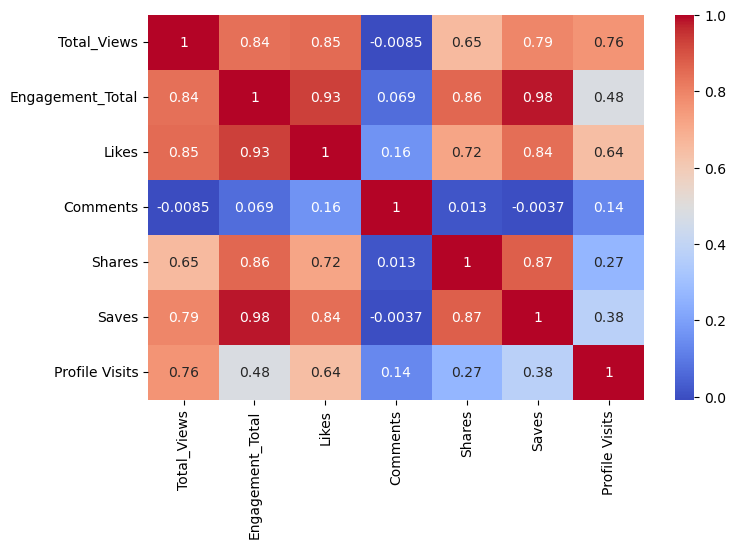

In [141]:
# choose the suitable size to display heatmap
plt.figure(figsize=(8,5))
# Plot the correlation matrix with annotations using the 'magma' colormap
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

- this shows the values range from 1 to -1 (strong negative correlation). For example, Engagement_Total and Saves show a strong positive correlation of 0.98, meaning as engagement increases, saves increase proportionally , Total_Views and Comments have a correlation of -0.0085, which is nearly zero, indicating almost no relationship between them.

In [46]:
# Import WordCloud to generate a visual representation of the most frequent words in the text data
from wordcloud import WordCloud

In [47]:
# Creating a new column word_df that splits each caption into a list of words.
df['word_df']= df["Caption"].apply(lambda x: (str(x).split()))

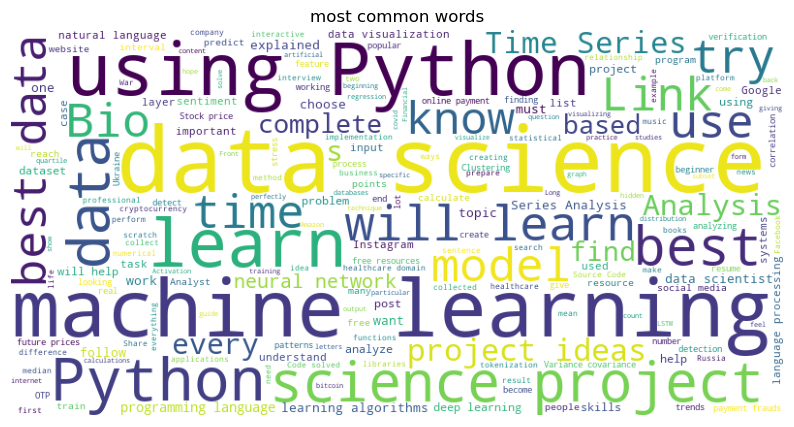

In [147]:
# Generate a word cloud to visualize the most frequently used words in the captions
text = " ".join(df['word_df'].apply(lambda x: " ".join(x)))
# Create a Word Cloud from the text to display common words
WC= WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,6))
plt.title("most common words")
plt.imshow(WC)
plt.axis("off")
plt.show()

- The word cloud prominently highlights data science-related terms with "data," "science," "machine learning," "python," and "using" as the most frequent words. This visualization clearly shows a strong focus on educational content around data science, programming, and Python

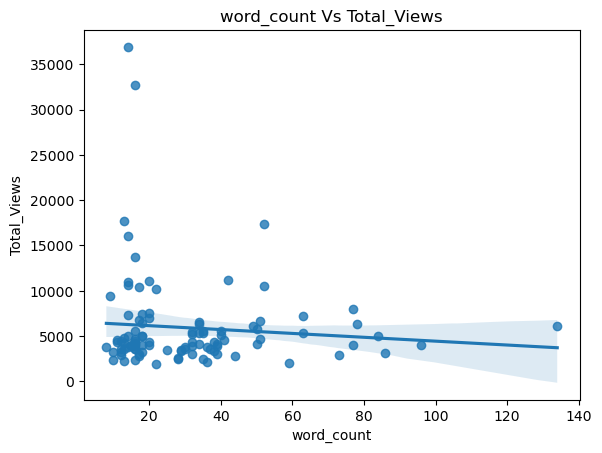

In [49]:
# what is the relationship between word_count and Total_Views
sns.regplot(data=df,x='word_count',y='Total_Views')
plt.title('word_count Vs Total_Views')
plt.xlabel('word_count')
plt.ylabel('Total_Views')
plt.show()

- The scatter plot shows a weak negative relationship between word count and total views, with shorter articles (10-30 words) generally receiving higher view counts, while the regression line indicates a slight downward trend as word count increases.

In [50]:
# # Create a scatter plot to examine the relationship between Engagement_Total and Total_Views
px.scatter(df,x='Engagement_Total',y='Total_Views',trendline='ols',trendline_color_override='red')

- The scatter plot with the OLS trendline demonstrates a strong positive linear relationship between Engagement Total and Total Views. As engagement increases, total views tend to rise proportionally

In [51]:
#display the relationshiop between Follows and Profile Visits
px.scatter(df,x='Follows',y='Profile Visits',trendline='ols',trendline_color_override='green')

- The scatter plot shows a moderate positive correlation between Follows and Profile Visits, with the green trendline indicating that increased profile visits generally lead to more followers

<Figure size 1000x600 with 0 Axes>

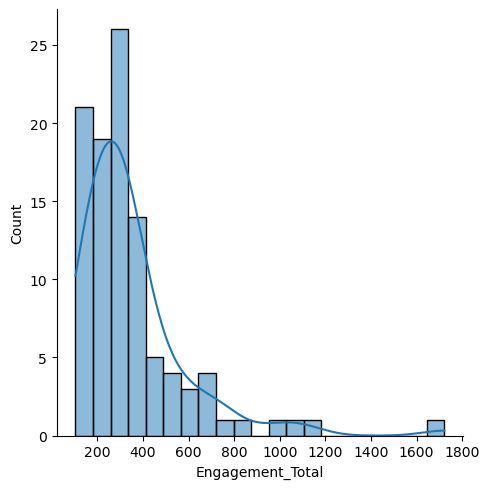

In [69]:
# Visualize the distribution of Engagement_Total using a histogram with KDE
plt.figure(figsize=(10,6))
sns.displot(df['Engagement_Total'],kde=True)
plt.show()

- The histogram reveals a right-skewed distribution (skewness > 0) with most engagement values concentrated between 100-400, while a few posts achieve exceptionally high engagement up to 1800. The distribution also shows high kurtosis (k > 3), indicating heavy tails with occasional viral outliers, suggesting that while most content receives moderate engagement, a small portion generates significantly higher interaction.

In [53]:
df.sample(1)

Total_Views  Home_Views  Hashtags_Views  Explore_Views  Other_Views  \
44         3786        2632             616            468           25   

    Saves  Comments  Shares  Likes  Profile Visits  ...  Sum_of_Sources  \
44    144         9       5    167              19  ...            3741   

   main_Hashtag Views_Category  Engagement_Total Engagement_Class   Top_Views  \
44       python      low_Views               325      Medium_rate  Home_Views   

    Follow_Rate word_count sentence_count  \
44    21.052632         14              2   

                                              word_df  
44  [Heres, how, you, can, create, a, QR, code, b...  

[1 rows x 23 columns]

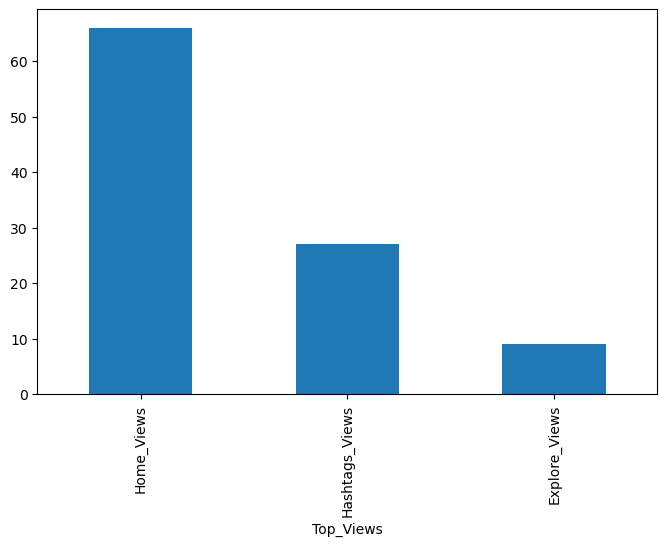

In [54]:
# Display the distribution of top view types
plt.figure(figsize=(8,5))
df['Top_Views'].value_counts().plot(kind='bar')
plt.show()

- The bar chart clearly shows that Home Views dominate with approximately 66 posts, significantly outperforming Hashtags Views (27 posts) and Explore Views (9 posts). This indicates that most content visibility comes from followers' home feeds rather than discovery through hashtags or the explore page, suggesting a strong existing audience base.Retry

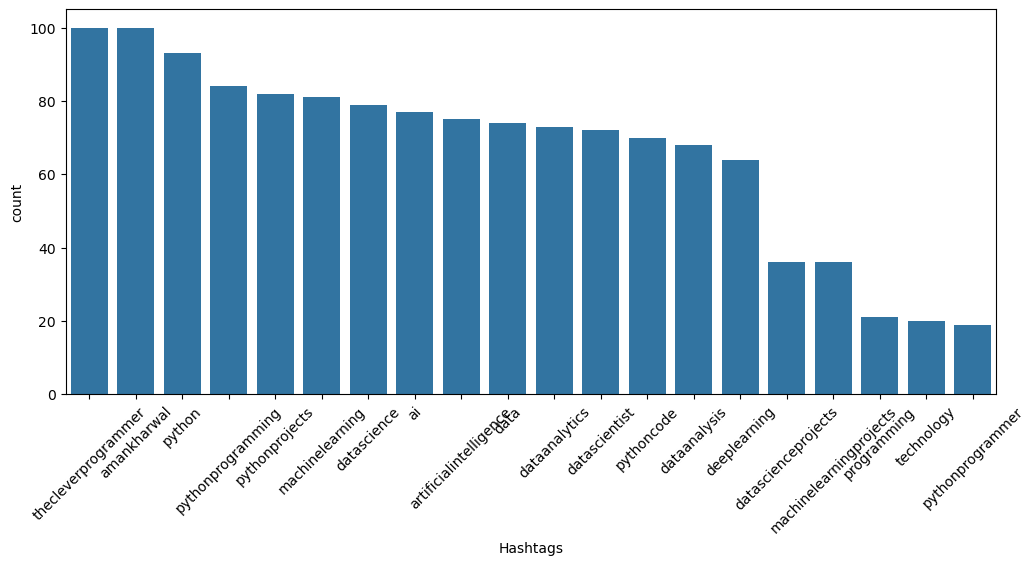

In [55]:
Hashtags_count= Hashtags_df['Hashtags'].value_counts()[:20]
plt.figure(figsize=(12,5))
sns.barplot(Hashtags_count)
plt.xticks(rotation = 45)
plt.show()

- The bar chart reveals that #thecleverprogrammer and #analyticalvidhya are the most used hashtags with approximately 100 occurrences each, followed by #python and other data science-related tags. The frequency gradually decreases across the top 20 hashtags, showing a strategic focus on programming education, Python, machine learning, and data science communities, with less frequent use of specialized tags like #deeplearning and #technology toward the lower end of the ranking.

In [56]:
df.sample(1)

Total_Views  Home_Views  Hashtags_Views  Explore_Views  Other_Views  Saves  \
8         3749        2384             857            248           49    155   

   Comments  Shares  Likes  Profile Visits  ...  Sum_of_Sources  \
8         6       8    159              36  ...            3538   

    main_Hashtag Views_Category  Engagement_Total Engagement_Class  \
8  dataanalytics      low_Views               328      Medium_rate   

    Top_Views  Follow_Rate word_count sentence_count  \
8  Home_Views    11.111111         30              3   

                                             word_df  
8  [Here, are, some, of, the, best, data, analysi...  

[1 rows x 23 columns]

In [64]:
# choose the higher 5 in main_Hashtag
top_5_Hashtag = df['main_Hashtag'].value_counts()[:5]

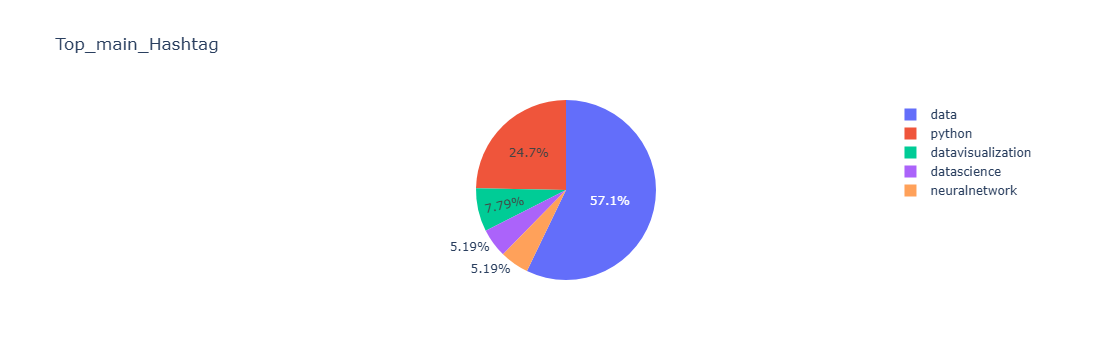

In [67]:
# Display the higher 5 in main_Hashtag
px.pie(names = top_5_Hashtag.index , values=top_5_Hashtag.values ,title='Top_main_Hashtag')

- Looking at your top 5 hashtags, #data dominates with 57.1%, showing a strong data-focused approach! This is followed by #python at 24.7%, #datavisualization at 7.79%, and both #datascience and #neuralnetwork at 5.19% each, reflecting a well-rounded interest in data science and its various applications.

In [59]:
df.columns

Index(['Total_Views', 'Home_Views', 'Hashtags_Views', 'Explore_Views',
       'Other_Views', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Sum_of_Sources', 'main_Hashtag',
       'Views_Category', 'Engagement_Total', 'Engagement_Class', 'Top_Views',
       'Follow_Rate', 'word_count', 'sentence_count', 'word_df'],
      dtype='object')

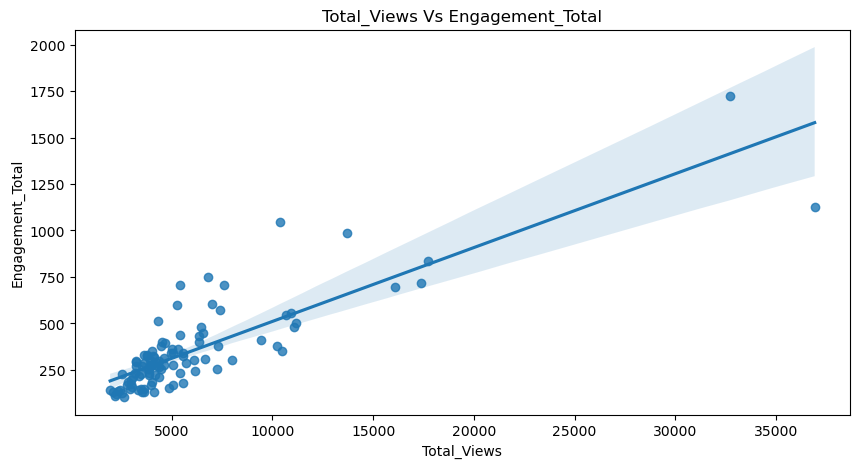

In [68]:
# Visualize the relationship between Total_Views and Engagement_Total using a regression plot
plt.figure(figsize=(10,5))
sns.regplot(data=df,x='Total_Views',y='Engagement_Total')
plt.title('Total_Views Vs Engagement_Total')
plt.xlabel('Total_Views')
plt.ylabel('Engagement_Total')
plt.show()

- The scatter plot reveals a strong positive correlation between Total Views and Engagement Total, indicated by the upward trending regression line. As content receives more views, engagement tends to increase proportionally, though some outliers show high engagement despite moderate views, suggesting that content quality matters beyond just visibility.

In [79]:
# Save new data after analysis
df.to_csv('Final_Instagram_Analysis.csv')

## Conclusion

- The analysis shows that engagement strongly drives key performance metrics, with high correlations between Engagement Total, Saves, and Total Views. Most visibility comes from Home Views, indicating a stronger established audience than discoverability through hashtags or Explore. Hashtag usage is highly focused on data-science themes, reinforcing a consistent niche identity. Word cloud results and hashtag frequencies confirm a strong emphasis on Python, machine learning, and educational content. Although most posts achieve moderate engagement, a few outliers perform exceptionally well, reflecting the impact of high-quality content. Scatter plots also reveal meaningful relationships between profile visits, follows, and engagement levels. Overall, the account demonstrates strong audience loyalty and clear content focus, with opportunities to improve reach through optimized discoverability strategies.